# Luentoviikko 4

## Harjoitustyö

Osallistuin viikon opetukseen katsomalla varsinaisen luennon videotallenteet sekä demon panoptosta. 

Päiväkirjan teossa käytettyä aineistoa:
- https://github.com/InfoTUNI/joda2022/blob/master/luentomuistio/luento04.ipynb
- https://github.com/InfoTUNI/joda2022/blob/master/koodiesimerkit/airnbn/python_scikit_airbnb.ipynb
- https://github.com/InfoTUNI/joda2022/blob/master/koodiesimerkit/Session%204%20-%20Categorical%20and%20Missing%20Data.ipynb

### Viikon keskeiset asiat

Harjoitustyötä lähdetään tekemään CRISP-DM mallia mukaillen, joka on tuttu ensimmäiseltä luentoviikolta. Harjoitustyön hahmottelun apuna voi käyttää mahdollisuuskehikkoa, johon asetellaan tutkimusongelmaan liittyviä aiheita projektin kokonaiskuvan havainnollistamiseksi.

Kuten "oikeissa" datatiedeprojekteissa, myös harjoitustyössä lähdetään liikkeelle tutkimuskysymyksestä.  Harjoitustyössä tavoitteena on oppia uutta ratkaisevasta ongelmasta ja siihen liittyvästä toimialasta ("Esitetään mielenkiintoisia kysymyksiä"). Olennaista on ongelmalähtöinen ajattelu, eikä niinkään pelkkä data tai sen käsittely. Projektin on tuotettava hyödyllistä tietoa kyseisen organisaation toimintaan.

Harjoitustyössä käytettävää dataa voidaan hankkia useasta lähteestä. Kaggle-palvelussa on useita valmiita datasettejä usealta eri toimialata. Verkossa on myös saatavilla myös useita ilmaisia ja avoimia rajapintoja, joista dataa voi hakea API-ohjelmoinnin keinoin. Todellisen maailman projekteissa hyödynnettävä data olla myös lähtöisin organisaation sisältä.

Datan keräämisen jälkeen harjoityössä siirryttään selvittämään sen varsinaista sisältöä. Tutkimusongelman kannalta on olennaista tietää, mitä datan sisältämät muuttujat kertovat, sekä miten ja mihin niitä voidaan käyttää. Kerätyssä datassa muuttujien arvot saattavat olla luokiteltuna eri tavoin tai asettu eri yksiköihin. Osa arvoista voi olla virheellisiä tai puuttua kokonaan. Dataa on siivottava niin, että sitä voidaan hyödyntää projektille asetetun ongelman ratkaisussa.

Jotta ratkaistavaan ongelmaan voitaisiin vastata, tulee datasta löytää tutkimuksen kannalta olennaiset piirteet (muuttujat). Tarvittaessa piirteet on hyvä muunta muotoon, jossa niistä on eniten hyötyä. Esimerkiksi kappaleiden pituudet millisekunneissa vs. minuuteissa. Mikäli dataa kerätään useasta eri lähteestä, on selvitettävä miten ne saadan yhdistettyä järkevästi. Yhdistetyissä tai suurissa dataseteissä on joukossa luultavasti muutujia, jotka eivät ole projektin kannalta hyödyllisiä. 

Harjoitustyössä kerättyä ja jalostettua dataa visualisoidaan esimerkiksi erilaisten Python-kirjastojen avulla. Tässäkin vaihessa korostuu vastaaminen alussa asetettuun tutkimusongelmaan. Saatavilla olevia kirjastoja on useita. Visualisointimenetelmät ja kuvattavat muuttujat on valittava tarkoin, jotta niistä on hyötyä ongelmanratkaisussa.

Lopuksi harjoitustyön tutkimusongelmaan pyritään vastamaan mallintamalla dataa, esimerkiksi koneoppimista hydöyntämällä. Yllä kuvattu prosessi on kuitenkin iteratiivinen. Projektia voidaan laajentaa esimerkiksi uusilla datalähteillä, kuvaamalla dataa eri tavoin tai tarkentamalla alussa asetettua tutkimuskysymystä.

### Viisi oivallusta
- Datatiedeprojektissa tutkimuskysymys/-ongelma on erittäin keskeisessä osassa
- Dataa voidaan kerätä useasta eri lähteestä ja sitä voidaan yhdistellä
- Data siistittävä ja jalostettava oikein, helpottaa myöhempää käsittelyä
- Visualisointi oltava tarkoituksenmukaista
- Iteratiivinen prosessi, myöhemmillä kerroilla parempi kokonaiskuva projektista

### Kehityskohteet
- Olisi ollut hyvä, jos vuorovaikuteiselle luenolle olisi voinut osallistua myös verkosta käsin

### Koodidemo

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Haetaan data
url = 'https://raw.githubusercontent.com/InfoTUNI/joda2022/master/koodiesimerkit/data.csv'
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16313 entries, 0 to 16312
Data columns (total 97 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        16313 non-null  int64  
 1   id                                16313 non-null  int64  
 2   listing_url                       16313 non-null  object 
 3   scrape_id                         16313 non-null  int64  
 4   last_scraped                      16313 non-null  object 
 5   name                              16302 non-null  object 
 6   summary                           15860 non-null  object 
 7   space                             11798 non-null  object 
 8   description                       16305 non-null  object 
 9   experiences_offered               16313 non-null  object 
 10  neighborhood_overview             10343 non-null  object 
 11  notes                             6734 non-null   object 
 12  tran

In [79]:
# Valitaan muuttujat, tarkastellaan arvioiden ja hinnan suhdetta toisiinsa
df = df[['id', 'review_scores_rating', 'price']]
df.head()

,id,review_scores_rating,price
0,18628,89.0,$54.00
1,19864,91.0,$65.00
2,21512,79.0,$40.00
3,21853,90.0,$17.00
4,23021,80.0,$90.00


In [80]:
# Poistetaan price-sarakkeen ylim. merkit ja muunnetaan se float-tyypiseksi
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16313 entries, 0 to 16312
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    16313 non-null  int64  
 1   review_scores_rating  13118 non-null  float64
 2   price                 16313 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 382.5 KB


C:\Users\lauri\AppData\Local\Temp\ipykernel_3504\1163424065.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

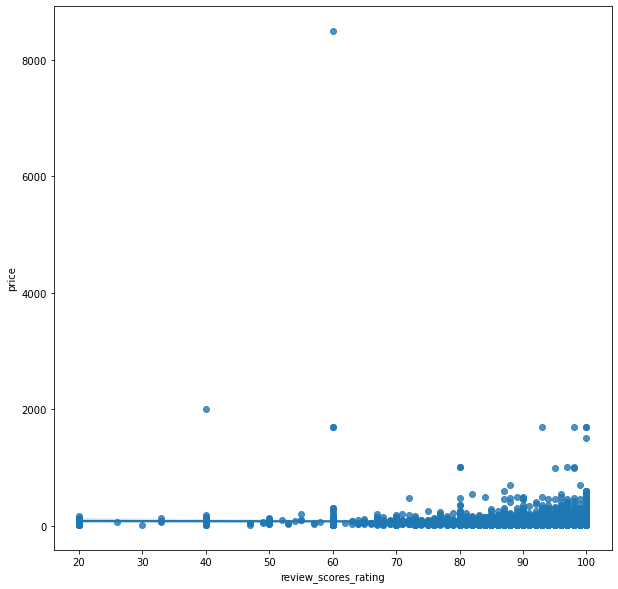

In [82]:
# Hahmotellaan valitut muutujat kuvaajaan
fig = plt.subplots(figsize=(10,10))
sns.regplot(x='review_scores_rating',y='price',data=df)